# Anime Recommender Project

#### Problem Statement
This purpose of the project is to make a simple anime recommender system and is aimed at matching users preferences and reduce time in deciding what next to watch. For this project the recommendations will be through collaborative filtering which involves user ratings, and hence it will not be content based.


#### Defining the Metric for Success
Creating a recommender system that can correctly predict and recommend animes a user would like, with a precision@k of atleast 80% and an average RMSE of 1 or less


#### Data Relevance
The data used is in the form of csv files. The dataset contains a list of anime titles as well users and their ratings of the same. The dataset can be found on Kaggle and the information was compiled from MyAnimeList.

### Importing Libraries

In [1]:
!pip install scikit-surprise


In [2]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import sparse
from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate


In [3]:
#loading datasets
dfanime = pd.read_csv(r"C:\Users\Awatef\OneDrive\Desktop\animeproject\anime.csv")
dfrating = pd.read_csv(r"C:\Users\Awatef\OneDrive\Desktop\animeproject\rating_complete.csv")

In [4]:
#preview dataframes
dfanime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [5]:
#preview of dataset 2
dfrating.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


In [6]:
#have to rename MAL_ID to anime_id to merge the two based on the animelist ID
dfanime.rename(columns = {'MAL_ID':'anime_id'}, inplace = True)

dfanime

,anime_id,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown


In [7]:
dfanime.shape

(17562, 35)

In [8]:
dfrating.shape

(57633278, 3)

In [9]:
dfanime.columns

Index(['anime_id', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

In [10]:
dfanime["Type"].unique()

array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music', 'Unknown'],
      dtype=object)

<AxesSubplot:>

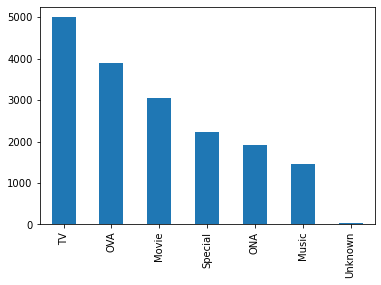

In [11]:
dfanime["Type"].value_counts().plot(kind='bar')

In [12]:
# will drop all types and only use TV
indexd = dfanime[ (dfanime['Type'] == "Music") | (dfanime['Type'] == "Unknown") |  (dfanime['Type'] == "OVA") |
                 (dfanime['Type'] == "ONA") |  (dfanime['Type'] == "Special") | (dfanime['Type'] == "Movie")].index
dfanime.drop(indexd , inplace=True)


In [13]:
#dropping unnecesary columns that wil not be of use
dfanimed = dfanime.drop(['Score', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'], axis=1)

In [14]:
dfanimed.head()

,anime_id,Name,Genres
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural"
5,15,Eyeshield 21,"Action, Sports, Comedy, Shounen"


In [15]:
dfanimed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4996 entries, 0 to 17561
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   anime_id  4996 non-null   int64 
 1   Name      4996 non-null   object
 2   Genres    4996 non-null   object
dtypes: int64(1), object(2)
memory usage: 156.1+ KB


In [16]:
dfanimed.duplicated().sum()

0

In [17]:
dfanimed.isnull().sum()

anime_id    0
Name        0
Genres      0
dtype: int64

In [18]:
dfrating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


In [19]:
dfrating.duplicated().sum()

0

In [20]:
dfrating.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [21]:
#keeping the searchRecommender PG
dfanime_clean = dfanimed[~dfanimed['Genres'].str.contains("Hentai")]
dfanime_clean

,anime_id,Name,Genres
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural"
5,15,Eyeshield 21,"Action, Sports, Comedy, Shounen"
...,...,...,...
17555,48471,Tsuki to Laika to Nosferatu,"Sci-Fi, Space, Vampire"
17558,48483,Mieruko-chan,"Comedy, Horror, Supernatural"
17559,48488,Higurashi no Naku Koro ni Sotsu,"Mystery, Dementia, Horror, Psychological, Supe..."
17560,48491,Yama no Susume: Next Summit,"Adventure, Slice of Life, Comedy"


In [22]:
#no need for genre column anymore, we drop it
dfanime_clean = dfanime_clean.drop(["Genres"], axis =1 )

dfanime_clean

,anime_id,Name
0,1,Cowboy Bebop
2,6,Trigun
3,7,Witch Hunter Robin
4,8,Bouken Ou Beet
5,15,Eyeshield 21
...,...,...
17555,48471,Tsuki to Laika to Nosferatu
17558,48483,Mieruko-chan
17559,48488,Higurashi no Naku Koro ni Sotsu
17560,48491,Yama no Susume: Next Summit


In [23]:
#merge the two on anime_id:
dfmain = pd.merge(dfrating,dfanime_clean,on='anime_id')
dfmain.head()

,user_id,anime_id,rating,Name
0,0,3010,7,Kaiketsu Zorro
1,53,3010,8,Kaiketsu Zorro
2,198,3010,7,Kaiketsu Zorro
3,478,3010,6,Kaiketsu Zorro
4,542,3010,8,Kaiketsu Zorro


In [24]:
dfmain.shape

(38541711, 4)

In [25]:
dfmain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38541711 entries, 0 to 38541710
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   int64 
 1   anime_id  int64 
 2   rating    int64 
 3   Name      object
dtypes: int64(3), object(1)
memory usage: 1.4+ GB


In [26]:
#change datatypes for anime_id and user_id:
convert_dict = {'user_id': object,
                'anime_id': object
                }
 
dfmain = dfmain.astype(convert_dict)

In [27]:
dfmain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38541711 entries, 0 to 38541710
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   object
 1   anime_id  object
 2   rating    int64 
 3   Name      object
dtypes: int64(1), object(3)
memory usage: 1.4+ GB


Since users generally post ratings on multiple animes we can now take a closer look and explore our ratings data with some EDA

## EDA

In [28]:
#checking for the top 10 animes that had most ratings
dfmain.groupby('Name')['rating'].count().sort_values(ascending=False).head(10)


Name
Death Note                          182375
Shingeki no Kyojin                  169794
Sword Art Online                    161192
Angel Beats!                        141127
One Punch Man                       138924
Code Geass: Hangyaku no Lelouch     137291
Toradora!                           135524
Fullmetal Alchemist: Brotherhood    134197
No Game No Life                     129009
Tokyo Ghoul                         128822
Name: rating, dtype: int64

In [29]:
#bottom 10 anime number of ratings
dfmain.groupby('Name')['rating'].count().sort_values(ascending=True).head(10)


Name
Jingju Mao                                              1
Usagi no Mofy (TV 2016)                                 1
Leonardo Hakase to Kirin-mura no Nakama desho           1
Mabeob Chunjamun Season 2                               1
Semi wa Magic Cube 2nd Season                           1
Black Clover                                            1
Jingju Mao Zhi Cheng Feng Polang                        1
Jingju Mao Zhi Xinnian de Maoxian                       1
Beastars 2nd Season                                     1
Zhandou Wang Zhi Jufeng Zhan Hun 5: Heti Fanwai Pian    1
Name: rating, dtype: int64

In [30]:
#lookint at ratings per anime
RperAnime = dfmain.groupby('Name')['rating'].count().sort_values(ascending=True)
RperAnime = pd.DataFrame(RperAnime)
RperAnime.describe()

,rating
count,4689.000000
mean,8219.601408
std,16890.038848
min,1.000000
25%,65.000000
50%,1221.000000
75%,8195.000000
max,182375.000000


Text(0.5, 1.0, ' Frequency count of number of ratings per anime')

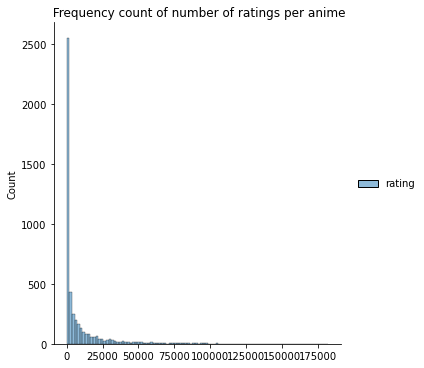

In [31]:
#plot of number of ratings per anime
sns.displot(RperAnime, bins=100)
plt.title(" Frequency count of number of ratings per anime")

The distribution is skewed to the right, about half the number of animes have between 1 and 1200 ratings from users while the other half are spread out upto around 182k. 

In [32]:
#number 0f ratings posted per user, top 10
dfmain.groupby('user_id')['rating'].count().sort_values(ascending=False).head(10)


user_id
189037    4504
68042     4339
162615    4209
283786    3610
277841    3099
190748    2956
64807     2883
259790    2810
336459    2759
291207    2686
Name: rating, dtype: int64

In [33]:
#number of ratings per user, bottom 10
dfmain.groupby('user_id')['rating'].count().sort_values(ascending=True).head(10)


user_id
57643     1
146200    1
146270    1
18404     1
146349    1
260072    1
319553    1
146358    1
51521     1
40473     1
Name: rating, dtype: int64

In [34]:
#looking at ratings per user
RperUser = dfmain.groupby('user_id')['rating'].count().sort_values(ascending=True)
RperUser = pd.DataFrame(RperUser)
RperUser.describe()

,rating
count,307881.000000
mean,125.183792
std,146.302543
min,1.000000
25%,31.000000
50%,80.000000
75%,167.000000
max,4504.000000


Text(0.5, 1.0, ' Frequency count of number of ratings per user')

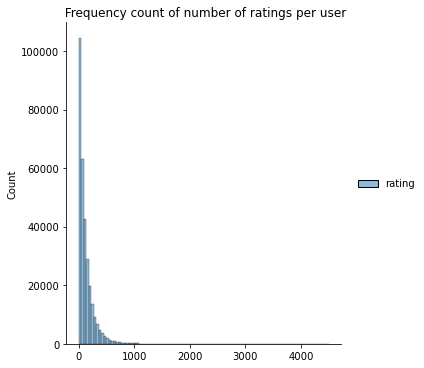

In [35]:
#plotting ratings per user
sns.displot(RperUser, bins=100)
plt.title(" Frequency count of number of ratings per user")

The distribution is skewed to the right, with about half the number users having 80 and below number of ratings posted.

In [36]:
#average ratings per anime
avgratings = pd.DataFrame(dfmain.groupby('Name')['rating'].mean())
avgratings.head()

,rating
Name,
"""Eikou Naki Tensai-tachi"" Kara no Monogatari",4.923077
.hack//Roots,7.049138
.hack//Sign,7.151968
.hack//Tasogare no Udewa Densetsu,6.705298
0-sen Hayato,6.500000


Text(0.5, 1.0, 'Histogram of average ratings per anime')

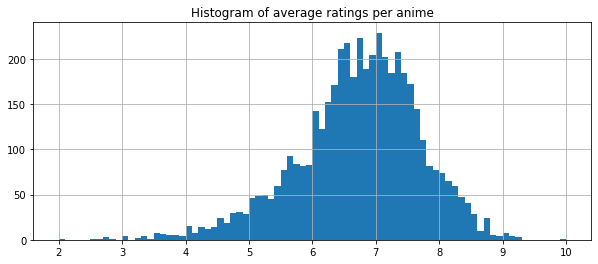

In [37]:
plt.figure(figsize=(10,4))
avgratings['rating'].hist(bins=80)
plt.title("Histogram of average ratings per anime")

Number of ratings of most of the anime in the anime database fall below 25,000. An exceptional number with high popularity have much more, the highest having upwords of 182k as was seen in earlier exploration.
The distribution of average rating follows a somewhat normal distribution as shown above with highest frequency with somewhere btween 6 and 8.

In [38]:
#since we'll be recommending based on what other users have watched and rated, the more ratings given to an anime 
#the less likely biased it will be, it will also capture more diverse users

#will drop animes that have less than 500 number of ratings

drop = dfmain.groupby('Name')['rating'].filter(lambda x : len(x)<500).index
dfmain.drop(drop , inplace=True)

dfmain

,user_id,anime_id,rating,Name
0,0,3010,7,Kaiketsu Zorro
1,53,3010,8,Kaiketsu Zorro
2,198,3010,7,Kaiketsu Zorro
3,478,3010,6,Kaiketsu Zorro
4,542,3010,8,Kaiketsu Zorro
...,...,...,...,...
38489026,350003,32011,5,Hakuouki: Otogisoushi
38489027,350315,32011,8,Hakuouki: Otogisoushi
38489028,350413,32011,7,Hakuouki: Otogisoushi
38489029,350666,32011,6,Hakuouki: Otogisoushi


In [39]:
#will also drop users that have less than 30 ratings
#to try make it less sparse

drop = dfmain.groupby('user_id')['rating'].filter(lambda x : len(x)<30).index
dfmain.drop(drop , inplace=True)

dfmain

,user_id,anime_id,rating,Name
1,53,3010,8,Kaiketsu Zorro
2,198,3010,7,Kaiketsu Zorro
3,478,3010,6,Kaiketsu Zorro
4,542,3010,8,Kaiketsu Zorro
5,639,3010,8,Kaiketsu Zorro
...,...,...,...,...
38489026,350003,32011,5,Hakuouki: Otogisoushi
38489027,350315,32011,8,Hakuouki: Otogisoushi
38489028,350413,32011,7,Hakuouki: Otogisoushi
38489029,350666,32011,6,Hakuouki: Otogisoushi


In [40]:
dfmain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37417984 entries, 1 to 38489030
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   user_id   object
 1   anime_id  object
 2   rating    int64 
 3   Name      object
dtypes: int64(1), object(3)
memory usage: 1.4+ GB


In [57]:
#number of unique users in df
dfmain["user_id"].nunique()

233450

In [58]:
#number of unique animes in df
dfmain["anime_id"].nunique()

2777

## Building the Recommender System

### Collaborative Filtering using Pearson Correlation

We will first try item based recommendation by using pearson correlation (r) as our similarity measure

In [41]:
# creating a pivot table so that each row represents a user and their ratings across anime titles

#userRatings = pd.pivot_table(dfmain, index="user_id", columns="anime_id", values="rating")
#userRatings.head()

# the above pivot table causing overflow error so will use groupby:

userRatings = dfmain.groupby(['user_id', 'anime_id'])['rating'].max().unstack()
userRatings.head()


anime_id,1,6,7,8,15,16,17,18,19,20,...,41466,41574,41619,41783,41930,42260,42517,42571,42668,42883
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Creating the correlation matrix from our groupby table

corrMatrix = userRatings.corr(method='pearson')


In [43]:
print(corrMatrix)

anime_id     1         6         7         8         15        16     \
anime_id                                                               
1         1.000000  0.367633  0.201599  0.180125  0.134402  0.274396   
6         0.367633  1.000000  0.303565  0.331182  0.341681  0.250208   
7         0.201599  0.303565  1.000000  0.385583  0.343133  0.267690   
8         0.180125  0.331182  0.385583  1.000000  0.494064  0.302193   
15        0.134402  0.341681  0.343133  0.494064  1.000000  0.220967   
...            ...       ...       ...       ...       ...       ...   
42260     0.065467  0.135756  0.381798  0.315420  0.328229  0.326997   
42517     0.061885  0.185960  0.244382  0.441771  0.144612  0.041890   
42571     0.143811  0.140216  0.251789  0.388762  0.310777  0.242412   
42668     0.210265  0.340254  0.242685  0.268327  0.437526  0.312499   
42883     0.207576  0.212777  0.355335  0.299312  0.300232  0.207583   

anime_id     17        18        19        20     ...     41466

In [44]:
#creating a dataframe of the correlation matrix for easier viewing

corrMatrixdf = pd.DataFrame(corrMatrix)
corrMatrixdf.head(20)

anime_id,1,6,7,8,15,16,17,18,19,20,...,41466,41574,41619,41783,41930,42260,42517,42571,42668,42883
anime_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.367633,0.201599,0.180125,0.134402,0.274396,0.113155,0.201277,0.300898,0.099495,...,0.050981,0.193205,0.086953,0.115809,0.140554,0.065467,6.188484e-02,0.143811,0.210265,0.207576
6,0.367633,1.000000,0.303565,0.331182,0.341681,0.250208,0.266266,0.302384,0.270576,0.226913,...,0.110653,0.328984,0.191003,0.204105,0.291001,0.135756,1.859601e-01,0.140216,0.340254,0.212777
7,0.201599,0.303565,1.000000,0.385583,0.343133,0.267690,0.394515,0.322208,0.207644,0.228081,...,0.272598,0.395193,0.221829,0.301442,0.245859,0.381798,2.443819e-01,0.251789,0.242685,0.355335
8,0.180125,0.331182,0.385583,1.000000,0.494064,0.302193,0.526376,0.367509,0.241125,0.405547,...,0.367639,0.305397,0.143342,0.242378,0.431594,0.315420,4.417706e-01,0.388762,0.268327,0.299312
15,0.134402,0.341681,0.343133,0.494064,1.000000,0.220967,0.470537,0.447056,0.180725,0.400150,...,0.246190,0.338089,0.303817,0.306032,0.359588,0.328229,1.446117e-01,0.310777,0.437526,0.300232
16,0.274396,0.250208,0.267690,0.302193,0.220967,1.000000,0.221373,0.271885,0.287349,0.133167,...,-0.004127,0.349496,0.231581,0.262663,0.196562,0.326997,4.188976e-02,0.242412,0.312499,0.207583
17,0.113155,0.266266,0.394515,0.526376,0.470537,0.221373,1.000000,0.436475,0.108192,0.351955,...,0.446845,0.580495,0.347997,0.258801,0.297901,0.399874,3.065460e-01,0.112900,0.462243,0.322477
18,0.201277,0.302384,0.322208,0.367509,0.447056,0.271885,0.436475,1.000000,0.235433,0.282953,...,0.194460,0.371706,0.280817,0.335308,0.341877,0.287084,4.071349e-01,0.280525,0.301515,0.402122
19,0.300898,0.270576,0.207644,0.241125,0.180725,0.287349,0.108192,0.235433,1.000000,0.107096,...,0.102525,0.291539,0.066137,0.086767,0.133684,0.053629,-2.432279e-03,0.137568,0.142932,0.119050


Correlation matrix above shows correlation coefficients, which ranges between -1 and 1. A value of near or equal to 0 implies little or no relationship while the closer it is to 1 or -1 implies strong positive and strong negative relationship respectively

In [45]:
## Creating a method to return anime recommendation based on user input on what they have watched in the past
## and returns similarity scores of similar movies

def get_recommendation(anime_id,rating):
    similar_ratings = corrMatrix[anime_id]*(rating)
    similar_ratings = similar_ratings.sort_values(ascending=False)
    return similar_ratings


In [46]:
## defining a user and sample inputs to test:

# anime1: Hunter x Hunter (2011) myanimelistID = 11061
# anime2: Yakusoku no Neverland  myanimelistID = 37779
# anime3: Ansatsu Kyoushitsu     myanimelistID = 24833
# anime4: Steins;Gate            myanimelistID = 9253

User = [(11061,9),(37779,8),(24833,6),(9253,9)]
similar_anime = pd.DataFrame()
for anime_id,rating in User:
    similar_anime = similar_anime.append(get_recommendation(anime_id,rating),ignore_index = True)

#print out similar anime
similar_anime.head(10)
similar_anime.sum().sort_values(ascending=False).head(10)

9253     15.222498
11061    15.146641
37779    15.038057
24833    13.871077
30654    12.774898
30484    11.628879
3668     11.573443
24625    11.466670
12365    11.224652
28701    11.202142
dtype: float64

Other than returning high similarity scores for the anime the user has already watched as seen with the first four results,
we can still see a number of anime returned with high scores as well. Lets look at some of the recommendations

Anime ID 30654 : Ansatsu Kyoushitsu 2nd Season 

Anime ID 30484 : Steins;Gate 0

Anime ID 3668  : Telepathy Shoujo Ran

Anime ID 24625 : Gundam Build Fighters Try



We can also see that it works by suggesting anime that are most similar to the anime input, as the first 2 new results are second seasons of animes that the user had already gave a decent rating. 

### Collaborative Filtering using SVD (Singular Value Decomposition)

Using surprise library, we'll use SVD - Singular Value Decomposition as our matrix factorisation algorithm.

In [47]:
#loading data through the reader, specifying our rating scale

reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(dfmain[['user_id', 'anime_id', 'rating']], reader=reader)

In [48]:
#getting RMSE using cross validation

svd = SVD()
cross_validate(svd, data, measures=['RMSE'])


{'test_rmse': array([1.09344489, 1.09413729, 1.09378231, 1.09415084, 1.09383419]),
 'fit_time': (2074.413873910904,
  2191.4976987838745,
  2166.1844923496246,
  2219.0915999412537,
  2194.8524708747864),
 'test_time': (347.70612835884094,
  291.6160454750061,
  347.02617859840393,
  230.6604642868042,
  259.6608462333679)}

The average RMSE is about 1.09 which is actually not bad as it is approximately 1. It could possibly be further improved with tuning, however it is sufficient so we can go ahead and fit the dataset so we can try predicting a user's rating

In [49]:
#fit dataset
trainset = data.build_full_trainset()
svd.fit(trainset)

In [50]:
#will pick a random user and see the anime theyve watched and rated so far
dfmain[dfmain['user_id'] == 639]


,user_id,anime_id,rating,Name
5,639,3010,8,Kaiketsu Zorro
24299,639,121,9,Fullmetal Alchemist
425971,639,38000,10,Kimetsu no Yaiba
600690,639,40221,9,Kami no Tou
696018,639,11061,9,Hunter x Hunter (2011)
...,...,...,...,...
37562316,639,37245,9,Gundam Build Divers
38125278,639,2032,8,Wellber no Monogatari: Sisters of Wellber
38204976,639,40074,8,Gibiate
38225675,639,3501,7,Wellber no Monogatari: Sisters of Wellber Zwei


In [51]:
# Based on what theyve watched we can pick a random anime so we can try predict how the user will rate it
# check anime id from animelist
# using Anime ID 34933 : Kakegurui
# we pass both user id and anime id as strings

u_id = str(639)
a_id = str(34933)
svd.predict(u_id, a_id, 7, verbose=True)


user: 639        item: 34933      r_ui = 7.00   est = 7.62   {'was_impossible': False}


Prediction(uid='639', iid='34933', r_ui=7, est=7.619450208755234, details={'was_impossible': False})

In [52]:
#For hyperparameter tuning we can try gridsearch to get the best parameters
#will however not do it for now to avoid further computational costs

#default values for svd() are:
# n_factors: 100
# n_epochs: 20
# lr_all: 0.005
# reg_all: 0.02




#param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.002, 0.005, 0.008],
#              'reg_all': [0.2, 0.4, 0.6]}
#grid_search = GridSearch(SVD, param_grid, measures=['RMSE'])


In [53]:
#### >from scikit surprise documentation
#defining a method to get precision at k

from collections import defaultdict
from surprise.model_selection import KFold


def precision_recall_at_k(predictions, k=10, threshold=6):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set it to 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set it to 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    return precisions, recalls


In [54]:
# Precision at k
# Recall at k  

kf = KFold(n_splits=5)


for trainset, testset in kf.split(data):
    svd.fit(trainset)
    predictions = svd.test(testset)
    precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=7)

    # Precision and recall can then be averaged over all users
    print(sum(prec for prec in precisions.values()) / len(precisions))
    print(sum(rec for rec in recalls.values()) / len(recalls))

0.9604677861544806
0.3250819751854184
0.9604479732465608
0.32510894303587945
0.9603657517870127
0.32498107733351633
0.9601817304296805
0.3246459302379143
0.9603817634279187
0.3250378327147516


Precision at k is the proportion of recommended items in the top-k set that are relevant while Recall at k is the proportion of relevant items found in the top-k recommendations. 
For each of the 5, the precision is high at an average of about 96% at k = 5. This means 96% of the anime recommendations made are relevant to the user.
The recall at k = 5 is at about an average of 32%, that is 32% of the total number of the relevant anime appear in the top-k results.

## Summary and Conclusion

For the project, we have used anime database 2020 to create a recommender system through collaborative filtering.
The dataset was too large hence we opted to only use anime of type "TV" to reduce computational costs and avoid overflow errors. Ideally all the types wouldve been included. Further dropping of rows/columns was to reduce sparcity and for quality control.

For buliding the recommender itself we first used an item based algorithm that was able to recommend on basis of anime similarity using pearsons r correlation. The recommender was able to suggest anime that are clearly somewhat similar to what the user has rated highly but not necessarily the best.
Next we tried a more complex model based recommender algorithm that uses matrix factorisation which was Singular Value Decomposition (SVD) through the scikit-surprise library. RMSE and precision at k metrics aims of 1 and atleast 80% respectively were met, and the recommender system works as expected





#### Some limitations to note

Recommender systems by collaborative filtering is generally a great way for users to discover new interests (in this case new anime) but on the other hand it suffers greatly from the cold start problem which describes the difficulty of making recommendations when the items or the users are new.

Hybrid recommender systems that take into account collaborative filtering as well as content and/or metadata should ideally give much better results as they take into account user features.

Due to limited capacity we were only able to check for RMSE and precision/recall at k, but there are other great metrics to consider in the case of recommender systems that take into account the rank or the order of the recommendations as well.